# Homework 2: Linear Regression
by Yousif Khaireddin and Sadie Allen

**Due date**: February 17, Wednesday by 11:59pm


## **Question 1:** Ridge regression derivation

**Throughout the following, please adhere to the following definitions**

$
n = number\ of\ samples \\
d = number\ of\ features \\
$

$
X = samples \in \mathcal{R}^{n x d}\\
y = labels \in \mathcal{R}^n \\
w = weight\ matrix \in \mathcal{R}^d
$

In class, we have derived the closed form solution for OLS Regression. 

$
loss = \sum_{i=0}^{n}||y_i - \sum_{j=0}^{d}x_{ij}w_j||^2 = (\textbf{y} - \textbf{Xw})^T (\textbf{y} - \textbf{Xw})
$
<br>


The optimal value for the parameter $\textbf{w}$ is given by

$
\textbf{w*} = (\textbf{X}^T \textbf{X})^{-1}\ \textbf{X}^T \textbf{y} \\
$

To control the variance of the parameters and avoid them growing to infinity and help with overfitting, ridge regression tries to regularize the loss fuction using w, shown below:
<br><br>


$
loss = (\textbf{y} - \textbf{Xw})^T (\textbf{y} - \textbf{Xw} ) + \lambda ||\textbf{w}||^2_2
$
<br><br>


The degree to which this regularization impacts the loss function is controlled by the $\lambda$ parameter. This is a hyper-parameter which must be tuned using a validation set.

<br>


Derive the closed form solution of ridge regression using the same workflow used in class to derive OLS.

**Hint:** You are trying to minimize the loss w.r.t. to $w$   


**Answer:**
(See bottom)

## **Question 2:**  Relationship between Lasso Regression and Maximum a posteriori estimation

As we have previously discussed in class, in linear regression, we can consider $y$ to be the product of the weight vector with the sample with some added noise factor. 

$ y = w^Tx + \mathcal{N} (0, \sigma^2) $

So, each $y_i$ is distributed according to a gaussian distribution goverend by the noise, and mean-shifted by $w^Tx$

$y \sim \mathcal{N} (w^Tx, \sigma^2)$

$p(y|x, w) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\sum_{i=1}^{n} \frac{-(y_i - x_i^Tw)^2}{2\sigma^2}} $
<br><br>


Additionally, assume the prior of the model is Laplacian whose coefficients are iid with zero mean and scale parameter $b$.

$p(w|\mu, b) = \frac{1}{2b}e^{\frac{-||w-\mu||_1}{b}}$
<br>


Show that the formula for LASSO linear regression can be derived via MAP estimation with a Laplace prior.


**Answer** 
(See bottom)

## **Question 3:** Linear Regression Implementation (OLS, Ridge)

Throughout this question we will be concerned with implementing Linear regression and Ridge regression and verifying our results against sklearn's inbuilt functions. 

To do this, we will be using a very simple and small dataset containing 50 samples and only 1 feature.  

This will enable us to plot and visualize everything along the way. 


### Data processing and Visualization

In [ ]:
import numpy as np
from sklearn.datasets import make_regression

X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=10
)

print("X shape:", X.shape, sep='\t')
print("y shape:", y.shape, sep='\t')

X shape:	(50, 1)
y shape:	(50,)


Create a scatter plot of all datapoints to see our data

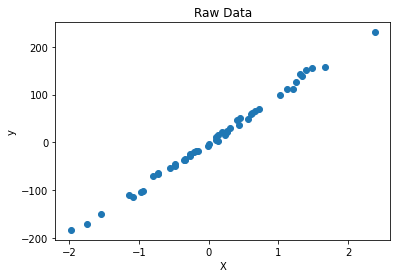

In [ ]:
from matplotlib import pyplot as plt

# -- Code Required --
plt.title('Raw Data')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X, y, marker='o')

Attach a vector of ones onto **X** to account for the bias value

In [ ]:
ones = np.ones((50, 1)) # -- Code Required --
X = np.append(X, ones, axis=1) # -- Code Required --

print("X shape:", X.shape, sep='\t')
print("y shape:", y.shape, sep='\t')

X shape:	(50, 2)
y shape:	(50,)


Using **train_test_split** from sklearn, seperate the data using a 60, 20, 20 split.

* Make sure to suffle the dataset using a **random_state** of 42

**Hint:** 

* This can be done easily with 2 calls to **train_test_split**. 

* The first call will split the data into train/test, and the second will split the train data into train/val

**Note:** 

Though we will have no use for the validation set in this question since we are merely concerned with creating all the required implementations at this time, it will be vital in the next question.

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, train_size=.8) # -- Code Required --
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, random_state=42, train_size=.75) # -- Code Required --

print("xtrain shape:", xtrain.shape, sep='\t')
print("xval shape:", xval.shape, sep='\t')
print("xtest shape:", xtest.shape, '\n', sep='\t')

print("ytrain shape:", ytrain.shape, sep='\t')
print("yval shape:", yval.shape, sep='\t')
print("ytest shape:", ytest.shape, sep='\t')

xtrain shape:	(30, 2)
xval shape:	(10, 2)
xtest shape:	(10, 2)	

ytrain shape:	(30,)
yval shape:	(10,)
ytest shape:	(10,)


### OLS

Define a function *get_loss* that takes the inputs X, y, and W and calculates the loss required (MSE). Its skeleton is shown below.

For full credit, create a vectorized implementation (no for loops).

In [ ]:
def get_loss(X, y, W):
    loss = np.matmul(np.transpose(y-np.matmul(X,W)),(y-np.matmul(X,W))) / len(y) # -- Code Required --
    return loss

Using the derivation done in class, implement the closed form solution for ordinary least squares.

Do this by defining a function *OLS* that takes the inputs $\mathbf{X}$ and $\mathbf{y}$ and returns $\mathbf{w}$. Its skeleton is shown below.

For full credit, do not use the inverse function

**Hint:** you may want to look into *numpy.linalg.solve* 

In [ ]:
def OLS(X, y):
    mat1 = np.matmul(np.transpose(X),X)
    mat2 = np.matmul(np.transpose(X),y)
    W = np.linalg.solve(mat1, mat2) # -- Code Required --

    return W

W_ols = OLS(xtrain, ytrain)
print("W_ols:", W_ols)

W_ols: [ 1.01054998e+02 -8.83448668e-02]


Create the following plots:
* a scatter plot of the training data overlayed by the OLS solution
* a scatter plot of the testing data overlayed by the OLS solution 

<Figure size 432x288 with 0 Axes>

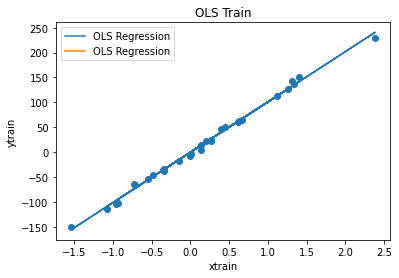

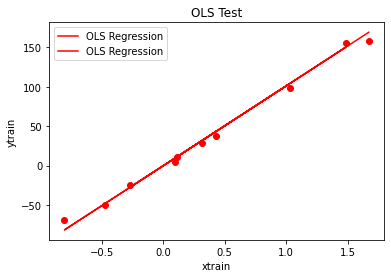

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt

# -- Code Required --
plt.scatter(xtrain[:,0], ytrain)
plt.plot(xtrain, W_ols[0]*xtrain+W_ols[1], label='OLS Regression')
plt.title('OLS Train')
plt.xlabel('xtrain')
plt.ylabel('ytrain')
plt.legend()
plt.figure()

plt.scatter(xtest[:,0], ytest, color='r')
plt.plot(xtest, W_ols[0]*xtest+W_ols[1], color='r', label='OLS Regression')
plt.title('OLS Test')
plt.xlabel('xtrain')
plt.ylabel('ytrain')
plt.legend()
plt.figure()

Compute training loss and testing loss using the *get_loss* function you have previously defined 

In [ ]:
loss_train = get_loss(xtrain, ytrain, W_ols) # -- Code Required --
loss_test = get_loss(xtest, ytest, W_ols) # -- Code Required --

print("Training Loss:", loss_train)
print("Testing Loss:", loss_test)

Training Loss: 31.058137679214596
Testing Loss: 42.851876889248445


### Ridge

Define a function *get_ridge_loss* that takes the inputs X, y, W, and $\lambda$ and calculates the loss required (MSE with L2 regularization). 

Its skeleton is shown below.

For full credit, create a vectorized implementation (no for loops).

In [ ]:
def get_ridge_loss(X, y, W, lmda):
    loss = get_loss(X, y, W) + lmda * np.matmul(np.transpose(W), W) # -- Code Required --
    return loss

Using your derivation from question 1, implement the closed form solution for ridge regression.

Do this by defining a function *ridge* that takes the inputs $\mathbf{X}$, $\mathbf{y}$, and $\lambda$ and returns $\mathbf{w}$. Its skeleton is shown below.

For full credit, do not use the inverse function

For now, we will set $\lambda = 0.1$. 
This performance will not be optimal, but we will worry about this later

In [ ]:
def ridge(X, y, lmda):
    mat1 = np.matmul(np.transpose(X), X) + lmda * np.identity(X.shape[1])
    mat2 = np.matmul(np.transpose(X), y)
    W = np.linalg.solve(mat1, mat2) # -- Code Required --

    return W

lmda = 0.1
W_ridge = ridge(xtrain, ytrain, lmda)
print("W_ridge:", W_ridge)

W_ridge: [ 1.00606862e+02 -2.34634212e-02]


Create the following plots:
* a scatter plot of the training data overlayed by the ridge solution
* a scatter plot of the testing data overlayed by the ridge solution 

<Figure size 432x288 with 0 Axes>

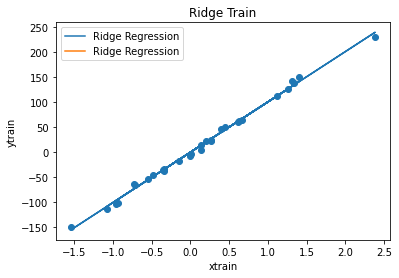

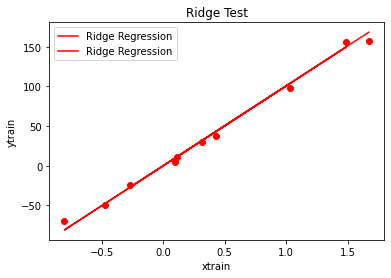

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt

# -- Code Required --
plt.scatter(xtrain[:,0], ytrain)
plt.plot(xtrain, W_ridge[0]*xtrain+W_ridge[1], label='Ridge Regression')
plt.title('Ridge Train')
plt.xlabel('xtrain')
plt.ylabel('ytrain')
plt.legend()
plt.figure()

plt.scatter(xtest[:,0], ytest, color='r')
plt.plot(xtest, W_ridge[0]*xtest+W_ridge[1], color='r', label='Ridge Regression')
plt.title('Ridge Test')
plt.xlabel('xtrain')
plt.ylabel('ytrain')
plt.legend()
plt.figure()

Compute training loss and testing loss using the *get_ridge_loss* function you have previously defined 

In [ ]:
loss_train = get_ridge_loss(xtrain, ytrain, W_ridge, lmda) # -- Code Required --
loss_test = get_ridge_loss(xtest, ytest, W_ridge, lmda) # -- Code Required --

print("Training Loss:", loss_train)
print("Testing Loss:", loss_test)

Training Loss: 1043.3825438223294
Testing Loss: 1052.5995501130883


### Verifying Results

Use sklearn's pre-built OLS model on our dataset and verify that your implementation matches its result

Do this by printing $w_{ols}$ from your implementation and sklearn's implementation

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Previous result
W_ols = OLS(xval, yval) # -- Code Required --
print("W_ols:", W_ols)

# Sklearn result
W_ols_sklearn = LinearRegression() # -- Code Required --

# Fit Sklearn Model
# -- Code Required --
W_ols_sklearn.fit(xval, yval)

print("W_ols_sklearn", W_ols_sklearn.coef_[:-1], W_ols_sklearn.intercept_)

W_ols: [94.24979486 -1.82831136]
W_ols_sklearn [94.24979486] -1.8283113602707246


Use scklearn's pre-built Ridge model on our dataset and verify that your implementation matches its result.

Use the same $\lambda = 0.1$ from the previous section

Do this by printing $w_{ridge}$ from your implementation and sklearn's implementation

In [ ]:
from sklearn.linear_model import Ridge

# Previous result
W_ridge = ridge(xtrain, ytrain, lmda) # -- Code Required --
print("W_ridge:", W_ridge) # This value has already been calculated previously, so I commented the above line

# Sklearn result
W_ridge_sklearn = Ridge(alpha=lmda) # -- Code Required --

# Fit Sklearn Model
# -- Code Required --
W_ridge_sklearn.fit(xtrain, ytrain)

print("W_ridge_sklearn", W_ridge_sklearn.coef_[:-1], W_ridge_sklearn.intercept_)

W_ridge: [ 1.00606862e+02 -2.34634212e-02]
W_ridge_sklearn [100.60687668] -0.02354380831199343


## **Question 4:** Hyperparameter Tuning

Throughout this question, we will be interested in tuning the hyper parameter $\lambda$ in ridge regression. And showing ridge's impact vs regular OLS.

To do this, we will need a more complex dataset. One which has many redundant, non-informative dimensions. So we will be defining a new synthetic dataset using the code below.

Our dataset will have 50 samples, and 1000 features.

In [ ]:
import numpy as np
from sklearn.datasets import make_regression

X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1000,
    n_informative=2,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=10
)
y = abs(y)
print("X shape:", X.shape, sep='\t')
print("y shape:", y.shape, sep='\t')

X shape:	(50, 1000)
y shape:	(50,)


Attach a vector of ones onto **X** to account for the bias value

In [ ]:
ones = np.ones((50,1)) # -- Code Required --
X = np.append(X, ones, axis=1) # -- Code Required --

print("X shape:", X.shape, sep='\t')
print("y shape:", y.shape, sep='\t')

X shape:	(50, 1001)
y shape:	(50,)


Using **train_test_split** from sklearn, seperate the data using a 60, 20, 20 split.

* Make sure to suffle the dataset using a **random_state** of 42

**Hint:** 

* This can be done easily with 2 calls to **train_test_split**. 

* The first call will split the data into train/test, and the second will split the train data into train/val


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, train_size=.8) # -- Code Required --
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, random_state=42, train_size=.75) # -- Code Required --

print("xtrain shape:", xtrain.shape, sep='\t')
print("xval shape:", xval.shape, sep='\t')
print("xtest shape:", xtest.shape, '\n', sep='\t')

print("ytrain shape:", ytrain.shape, sep='\t')
print("yval shape:", yval.shape, sep='\t')
print("ytest shape:", ytest.shape, sep='\t')

xtrain shape:	(30, 1001)
xval shape:	(10, 1001)
xtest shape:	(10, 1001)	

ytrain shape:	(30,)
yval shape:	(10,)
ytest shape:	(10,)


### OLS

Using your implementation from the previous question,
get the OLS solution on this dataset.

In [ ]:
W_ols = OLS(xtrain, ytrain) # -- Code Required --
print("W_ols:", W_ols[:10])    # For the sake of cleanliness we will only print first 10 coefficients

W_ols: [ -13.26861093  298.01003142 -127.44260886  106.46641054  303.01110206
 -131.63697552   80.12829674 -289.14061156 -444.02100392  -72.2118103 ]


Using your loss function from the previous question, obtain the train, val, and test losses of OLS.

Is this solution over fitting the data? Explain.

In [ ]:
loss_train = get_loss(xtrain, ytrain, W_ols) # -- Code Required --
loss_val = get_loss(xval, yval, W_ols) # -- Code Required --
loss_test = get_loss(xtest, ytest, W_ols) # -- Code Required --

print("Training Loss:", loss_train)
print("Validation Loss:", loss_val)
print("Testing Loss:", loss_test)

Training Loss: 9.283699787792093e-24
Validation Loss: 14675023.61521715
Testing Loss: 16883461.083436023


**Answer**<br>
The solution is over fitting the data because while the training loss is low, the validation and testing loss is extremely high. This signifies overfitting.

### Ridge

Using your implementation from the previous question, and your validations data, tune the $\lambda$ parameter of ridge regression. 

Do this by creating a loop that varies $\lambda$ from 10e-20 to 10e-1 in factors of 10.

On each iteration 
* calculate W_ridge using your previous implementation
* calculate training and validation loss
* store the training loss, validation loss, and $\lambda$ value. These will be needed for the coming plots.

In [ ]:
train_loss_arr = []
val_loss_arr = []
lmdas = []

# -- Code Required --
for i in range(-20, 0):
  lmda = 10**i
  lmdas.append(lmda)
  W_ridge = ridge(xtrain, ytrain, lmda)
  train_loss_arr.append(get_ridge_loss(xtrain, ytrain, W_ridge, lmda))
  val_loss_arr.append(get_ridge_loss(xval, yval, W_ridge, lmda))

# print(train_loss_arr[:10])
# print(val_loss_arr[:10])
# print(lmdas[:10])

Create a plot of the losses as a function of lamda

<Figure size 432x288 with 0 Axes>

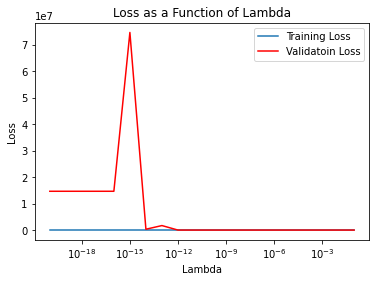

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt

# -- Code Required --
plt.plot(lmdas, train_loss_arr, label='Training Loss')
plt.plot(lmdas, val_loss_arr, label='Validatoin Loss', color='r')

plt.xscale('log')
plt.title('Loss as a Function of Lambda')
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.legend()
plt.figure()



Identify the best lambda $\lambda^*$, and train your final classifier $W^*_{ridge}$ on both the training and the validation data together.

In [ ]:
# Identifying lambda_star
min_val = min(val_loss_arr)
lmda_star = lmdas[val_loss_arr.index(min_val)] # -- Code Required --

# Creating final xtrain and ytrain
xtrain_final = np.concatenate((xtrain, xval), axis=0) # -- Code Required --
ytrain_final = np.concatenate((ytrain, yval), axis=0) # -- Code Required --

# Calculating W_ridge_star
W_ridge_star = ridge(xtrain_final, ytrain_final, lmda_star) # -- Code Required --

print("lmda_star:", lmda_star)
print("W_ridge_star:", W_ridge_star[:10]) # For the sake of cleanliness we will only print first 10 coefficients

lmda_star: 1e-09
W_ridge_star: [ 0.3665771  -0.56241768  1.71956546 -0.51824779  0.60807615 -0.43755518
 -0.82181921  0.03306205  0.88506299 -0.95328715]


Using your loss function *get_ridge_loss* from the previous question, obtain the train, val, and test losses of $W_{ridge}^*$. Then answer the following questions:
* Are we overfitting the dataset? Explain.
* How are we performing compared to OLS

In [ ]:
loss_train = get_ridge_loss(xtrain, ytrain, W_ridge_star, lmda_star) # -- Code Required --
loss_val = get_ridge_loss(xval, yval, W_ridge_star, lmda_star) # -- Code Required --
loss_test = get_ridge_loss(xtest, ytest, W_ridge_star, lmda_star) # -- Code Required --

print("Training Loss:", loss_train)
print("Validation Loss:", loss_val)
print("Testing Loss:", loss_test)

Training Loss: 4.1758425710220574e-07
Validation Loss: 4.175842571022181e-07
Testing Loss: 8237.190780112856


**Answer** <br>
We are still overfitting the dataset, but not nearly as bad as the OLS regression. The validation loss is extremely low and nearly the same as the training loss, and the testing loss is orders of magnitude lower than the OLS testing loss.